# Wine quality DataBase analyse

This file make reference to [Wine quality UCI Database](https://archive.ics.uci.edu/dataset/186/wine+quality).

## Database informations
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**List variables :**

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10)


# Wine quality DataBase analyse

This file make reference to [Wine quality UCI Database](https://archive.ics.uci.edu/dataset/186/wine+quality).

## Database informations
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**List variables :**

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10)


### Libraries to import
We have to had those libraries :
'Pandas' for dataframes part, 'numpy' for arrays, 'pyplot' from matplotlib for a graphical visualization as well as 'seaborn' for data visualization. Furthermore, we import 'statmodels.api' for ANOVA test, 'shapiro' librairy from 'scipy.stats' for Shapiro test and then 'scipy.stats' for statistic functions.

<u>Remark</u> : We add an import to 'stats_fct', a python script on which we put all the functions that we are going to use for our analyse.

In [ ]:
import pandas as pd #dataframe with mixed types
import numpy as np #array with same type elements
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
import scipy.stats as stats

from matplotlib.colors import LinearSegmentedColormap

import stats_fct as my

### Statistic functions script

For continuous variables we will use boxplot, histogrammes and qqplot

For discrete ones, diagrammes en batons

The for the categorical variables we will use camembert and diagramme à bandole

In [ ]:
#variables continues boxplot, histogrammes, qqplot
#variables discretes diagrammes en batons
#variables catégorielles camembert, diagramme à bandole

def plot_boxplot_histogram_qqplot(data, title, xlabel, ylabel):
    plt.figure(figsize=(12,6))
    # Create a boxplot and a historgam for age VA
    #VA age follow a normal law
    #legère dissimetrie gauche pour l'age, avantage de visualiser les données abérantes dans le box plott.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    #fonction boxplot de seaborn, si notch = false il fait des boites a moustaches
    #tout ce qui sort des moustaches est atypique
    sns.boxplot(y=data, color='lightblue', notch=True, flierprops={'marker':'o', 'markersize':8, 'markerfacecolor':'red'})#détecter les valeurs atypiques éventuelles
    plt.title(f'Boxplot of {title}')
    plt.subplot(1,3,2)
    sns.histplot(data, kde=False)
    plt.title(f'Histrogram of {title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig=plt.subplot(1,3,3)
    #QQ plot pour voir si visuellement le jeu de données est proche d'une loi normale
    #si loi normale, les points s'alignent à la droite x y
    #confrontation des fractiles de la loi normale avec ceux du jeu de données
    sm.qqplot(data, ax=fig, line='s')#line standardiser for normale fractiles law
    #pour l'age, les données empiriques et théroqies sont bien ajustées, ecart seulemen,t sur les grandes valeurs
    #parametres défini de la loi normales sont ceux de notre jeu de données
    plt.title(f'QQ Plot of {title}')
    plt.suptitle(f'Variable continue : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()
    
def plot_Categorial_distribution(data, title):
    frequencies = data.value_counts(normalize=True)
    fig, ax = plt.subplots(2,1,figsize=(12,6))
    ax[0].pie(frequencies, labels=frequencies.index, autopct='%1.1f%%')
    ax[0].set_title(f'Pie Chart of {title}')
    sns.barplot(x=frequencies.index, y=frequencies.values, ax=ax[1])
    ax[1].set_title(f'Bar Chart of {title}')
    plt.suptitle(f'Variable catégorielle : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()
    

def bar_plot_discrete_variables(data, title):
    #diagramme en batons
    frequencies = data.value_counts(normalize=True)
    sns.barplot(x=frequencies.index, y=frequencies.values)
    plt.title(f'Diagramme en bâtons nombre {title}')
    plt.xlabel(f'{title}')
    plt.ylabel('Frequency')
    #plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.suptitle(f'Variables discrètes : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()
    

#test de normalité de shapiro-wilk
def shapiro_wilk_test(data):
    """perform the Shapiro-Wilk test for normality
    parameters : data (pd.Series): A pandas Series containing numeric data
    Returns : float the N test statistic, float the p-value for the hypothesis test
    """
    #remove NaN values which can't be handled by the Shapiro-wilk, enlever les données manquantes
    data_clean = data.dropna()
    
    #perfirming the shapiro wilk test
    stat, p_value = shapiro(data_clean)
    
    #interpreting the result
    alpha = 0.05
    if p_value>alpha:
        print('X looks Gaussian (fail to reject H0)')
    else:
        print('X does not look Gaussian (reject H0)')
        
    return stat, p_value

### Main script

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

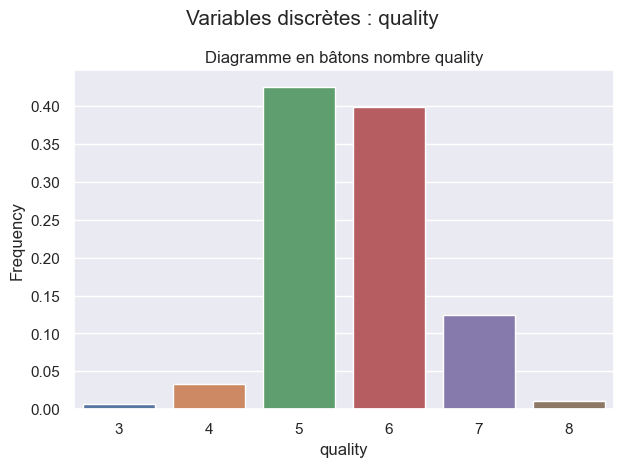

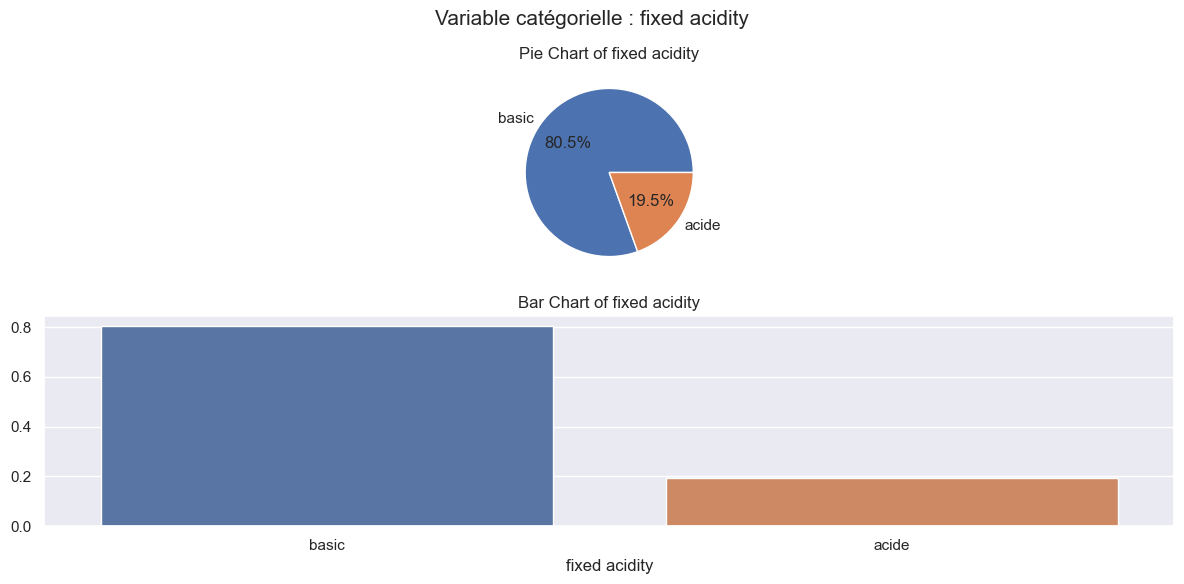

C:\Users\basti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


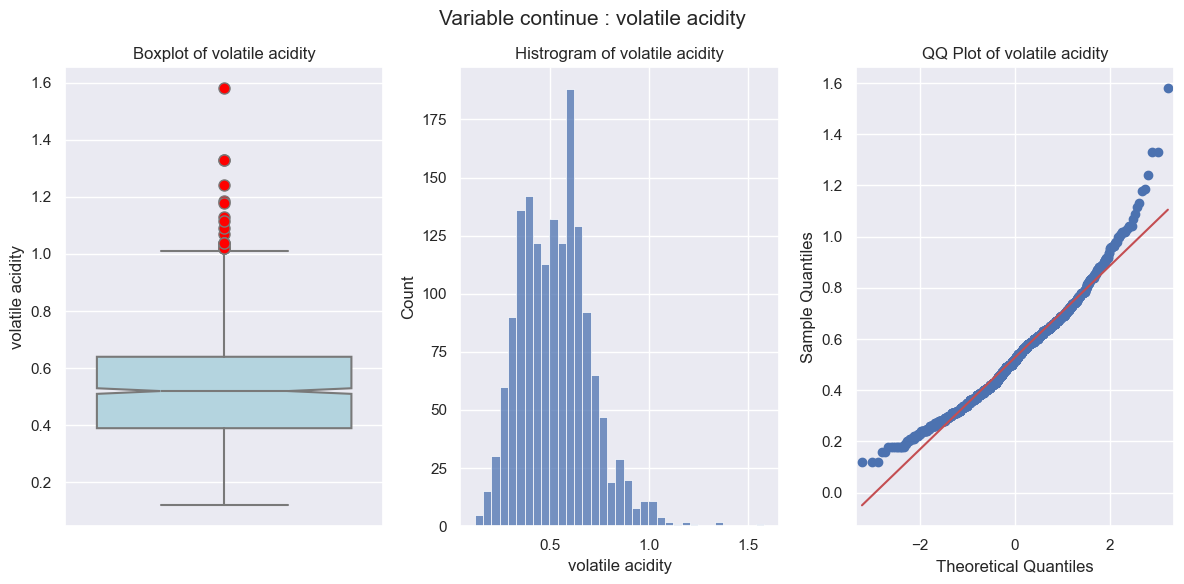

In [ ]:
import stats_fct

#variables continues (age) boxplot, histogrammes, qqplot
#variables discretes (enfants) diagrammes en batons
#variables catégorielles (urbaine) camembert, diagramme à bandole

sns.set_theme()#set seaborn_theme()

Data = pd.read_csv("winequality-red.csv", sep=';', decimal='.')#load data form csv file

#define data columns as variables for easy access
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

#extraction de colonnes par identifiant
fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality = (Data[col] for col in columns)

print(Data)

#creation d'une variable categorielle à partir d'une variable de float
# Définition d'une fonction pour mapper les valeurs de la colonne à "acide" ou "basic" en fonction de la condition
def map_acidity(value):
    if value < 7:
        return "acide"
    else:
        return "basic"

# Appliquer la fonction à la colonne "fixed acidity"
Data['fixed acidity'] = Data['fixed acidity'].apply(map_acidity)
fixed_acidity = Data['fixed acidity']
# Affichage du nombre d'occurrences de chaque catégorie
#print(Data['fixed acidity'].value_counts())


print(Data)
#print(fixed_acidity)

stats_fct.bar_plot_discrete_variables(quality, 'quality')
stats_fct.plot_Categorial_distribution(fixed_acidity, 'fixed acidity')
stats_fct.plot_boxplot_histogram_qqplot(volatile_acidity, 'volatile acidity', 'volatile acidity', 'Count')

### Libraries to import

We have to had those libraries :
'Pandas' for dataframes part, 'numpy' for arrays, 'pyplot' from matplotlib for a graphical visualization as well as 'seaborn' for data visualization. Furthermore, we import 'statmodels.api' for ANOVA test, 'shapiro' librairy from 'scipy.stats' for Shapiro test and then 'scipy.stats' for statistic functions.

<u>Remark</u> : We add an import to 'stats_fct', a python script on which we put all the functions that we are going to use for our analyse.

In [ ]:
import pandas as pd #dataframe with mixed types
import numpy as np #array with same type elements
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
import scipy.stats as stats

import stats_fct

### Statistic functions script

For continuous variables we will use boxplot, histogrammes and qqplot

For discrete ones, diagrammes en batons

The for the categorical variables we will use camembert and diagramme à bandole

In [ ]:
#variables continues boxplot, histogrammes, qqplot
#variables discretes diagrammes en batons
#variables catégorielles camembert, diagramme à bandole

def plot_boxplot_histogram_qqplot(data, title, xlabel, ylabel):
    plt.figure(figsize=(12,6))
    # Create a boxplot and a historgam for age VA
    #VA age follow a normal law
    #legère dissimetrie gauche pour l'age, avantage de visualiser les données abérantes dans le box plott.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    #fonction boxplot de seaborn, si notch = false il fait des boites a moustaches
    #tout ce qui sort des moustaches est atypique
    sns.boxplot(y=data, color='lightblue', notch=True, flierprops={'marker':'o', 'markersize':8, 'markerfacecolor':'red'})#détecter les valeurs atypiques éventuelles
    plt.title(f'Boxplot of {title}')
    plt.subplot(1,3,2)
    sns.histplot(data, kde=False)
    plt.title(f'Histrogram of {title}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig=plt.subplot(1,3,3)
    #QQ plot pour voir si visuellement le jeu de données est proche d'une loi normale
    #si loi normale, les points s'alignent à la droite x y
    #confrontation des fractiles de la loi normale avec ceux du jeu de données
    sm.qqplot(data, ax=fig, line='s')#line standardiser for normale fractiles law
    #pour l'age, les données empiriques et théroqies sont bien ajustées, ecart seulemen,t sur les grandes valeurs
    #parametres défini de la loi normales sont ceux de notre jeu de données
    plt.title(f'QQ Plot of {title}')
    plt.suptitle(f'Variable continue : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()
    
def plot_Categorial_distribution(data, title):
    frequencies = data.value_counts(normalize=True)
    fig, ax = plt.subplots(2,1,figsize=(12,6))
    ax[0].pie(frequencies, labels=frequencies.index, autopct='%1.1f%%')
    ax[0].set_title(f'Pie Chart of {title}')
    sns.barplot(x=frequencies.index, y=frequencies.values, ax=ax[1])
    ax[1].set_title(f'Bar Chart of {title}')
    plt.suptitle(f'Variable catégorielle : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()
    

def bar_plot_discrete_variables(data, title):
    #diagramme en batons
    frequencies = data.value_counts(normalize=True)
    sns.barplot(x=frequencies.index, y=frequencies.values)
    plt.title(f'Diagramme en bâtons nombre {title}')
    plt.xlabel(f'{title}')
    plt.ylabel('Frequency')
    #plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
    plt.suptitle(f'Variables discrètes : {title}', fontsize=15, y=0.97)  # Ajout du titre global
    plt.tight_layout()
    plt.show()
    

#test de normalité de shapiro-wilk
def shapiro_wilk_test(data):
    """perform the Shapiro-Wilk test for normality
    parameters : data (pd.Series): A pandas Series containing numeric data
    Returns : float the N test statistic, float the p-value for the hypothesis test
    """
    #remove NaN values which can't be handled by the Shapiro-wilk, enlever les données manquantes
    data_clean = data.dropna()
    
    #perfirming the shapiro wilk test
    stat, p_value = shapiro(data_clean)
    
    #interpreting the result
    alpha = 0.05
    if p_value>alpha:
        print('X looks Gaussian (fail to reject H0)')
    else:
        print('X does not look Gaussian (reject H0)')
        
    return stat, p_value

### Main script

In [ ]:
import stats_fct

#variables continues (age) boxplot, histogrammes, qqplot
#variables discretes (enfants) diagrammes en batons
#variables catégorielles (urbaine) camembert, diagramme à bandole

sns.set_theme()#set seaborn_theme()

Data = pd.read_csv("winequality-red.csv", sep=';', decimal='.')#load data form csv file

#define data columns as variables for easy access
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

#extraction de colonnes par identifiant
fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality = (Data[col] for col in columns)

print(Data)

#creation d'une variable categorielle à partir d'une variable de float
# Définition d'une fonction pour mapper les valeurs de la colonne à "acide" ou "basic" en fonction de la condition
def map_acidity(value):
    if value < 7:
        return "acide"
    else:
        return "basic"

# Appliquer la fonction à la colonne "fixed acidity"
Data['fixed acidity'] = Data['fixed acidity'].apply(map_acidity)
fixed_acidity = Data['fixed acidity']
# Affichage du nombre d'occurrences de chaque catégorie
#print(Data['fixed acidity'].value_counts())


print(Data)
#print(fixed_acidity)

stats_fct.bar_plot_discrete_variables(quality, 'quality')
stats_fct.plot_Categorial_distribution(fixed_acidity, 'fixed acidity')
stats_fct.plot_boxplot_histogram_qqplot(volatile_acidity, 'volatile acidity', 'volatile acidity', 'Count')